In [1]:
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dset
import torchvision.utils as vutils

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pathlib
from tqdm import tqdm
from PIL import Image

In [2]:
from utils.net_helper import *
from utils.trainer import train_loop
import network.networks as gans


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  
device

device(type='cuda', index=0)

### Process images and add to a dataloader

In [4]:
data = 'data/data_full/'
# data = 'data/data_small/'

In [5]:
image_size = 64
batch_size = 128

dataset_train = dset.ImageFolder(root=data,
                              transform=transforms.Compose([
                                  transforms.Resize(image_size),
                                  transforms.CenterCrop(image_size),
                                  transforms.ToTensor(),
                                  transforms.Normalize((.5,.5,.5), (.5,.5,.5))
                              ])
                            )

train_loader = torch.utils.data.DataLoader(dataset=dataset_train,
                                          batch_size=batch_size,
                                          shuffle=True)


### Setup networks

In [6]:
discriminator_lr = .0008
generator_lr = .0008

In [7]:
discriminator = gans.Gan_Discriminator([64,64,128,128], [3,3,3,3], [2,2,2,1])
discriminator.to(device)
discr_opt = torch.optim.Adam(discriminator.parameters(), lr = discriminator_lr)

criterion = nn.BCELoss()

generator = gans.Gan_Generator((64,16,16), [2,2,1,1], [128,64,64,3], [3,3,3,3], [1,1,1,1])
generator.to(device)
gen_opt = torch.optim.Adam(generator.parameters(), lr=generator_lr)

EPOCH:  1


/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([103])) that is different to the input size (torch.Size([103, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=s


DISCRIMINATOR Training loss:... 0.3589992670987133
GENERATOR Training loss:... 5.456239656621116

Best DLoss :  0.3589992670987133 ....OLD :  99999
Best GLoss :  5.456239656621116 ....OLD :  99999
show img


<Figure size 432x288 with 0 Axes>

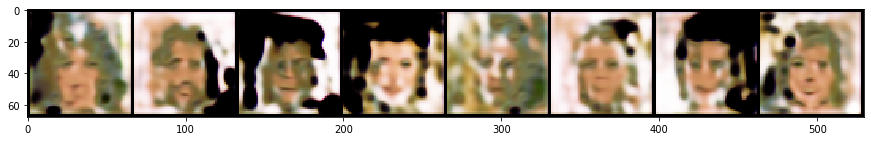


EPOCH:  2



DISCRIMINATOR Training loss:... 0.48667606277907866
GENERATOR Training loss:... 4.732844330619877

Best GLoss :  4.732844330619877 ....OLD :  5.456239656621116
show img


<Figure size 432x288 with 0 Axes>

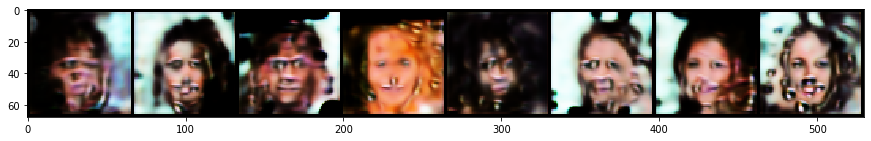


EPOCH:  3



DISCRIMINATOR Training loss:... 0.621628761322097
GENERATOR Training loss:... 3.9711486793965083

Best GLoss :  3.9711486793965083 ....OLD :  4.732844330619877
show img


<Figure size 432x288 with 0 Axes>

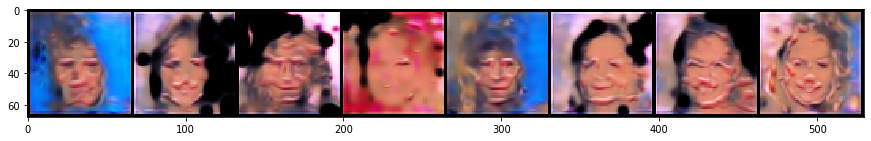


EPOCH:  4



DISCRIMINATOR Training loss:... 0.6529385603632512
GENERATOR Training loss:... 3.9327595968526596

Best GLoss :  3.9327595968526596 ....OLD :  3.9711486793965083
show img


<Figure size 432x288 with 0 Axes>

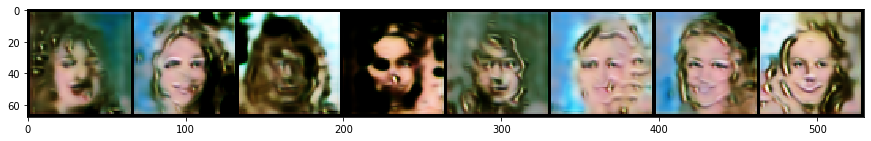


EPOCH:  5



DISCRIMINATOR Training loss:... 0.7391383537171916
GENERATOR Training loss:... 3.080244914911551

Best GLoss :  3.080244914911551 ....OLD :  3.9327595968526596
show img


<Figure size 432x288 with 0 Axes>

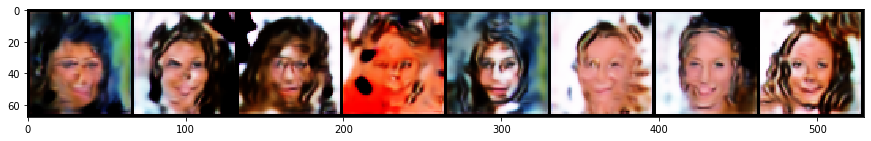


EPOCH:  6



DISCRIMINATOR Training loss:... 0.7181936808092848
GENERATOR Training loss:... 3.194397516515687

show img


<Figure size 432x288 with 0 Axes>

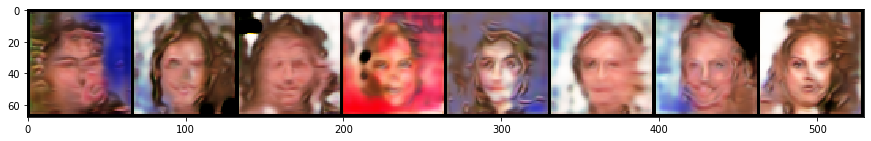


EPOCH:  7



DISCRIMINATOR Training loss:... 0.8093542865090971
GENERATOR Training loss:... 2.672557663254849

Best GLoss :  2.672557663254849 ....OLD :  3.080244914911551
show img


<Figure size 432x288 with 0 Axes>

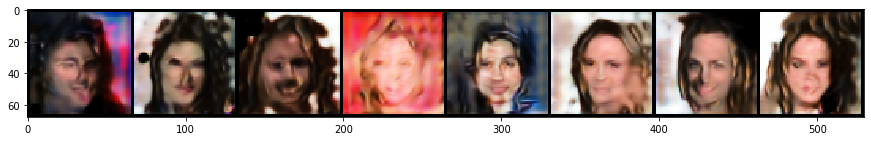


EPOCH:  8



DISCRIMINATOR Training loss:... 0.8606190244683117
GENERATOR Training loss:... 2.4247793265520134

Best GLoss :  2.4247793265520134 ....OLD :  2.672557663254849
show img


<Figure size 432x288 with 0 Axes>

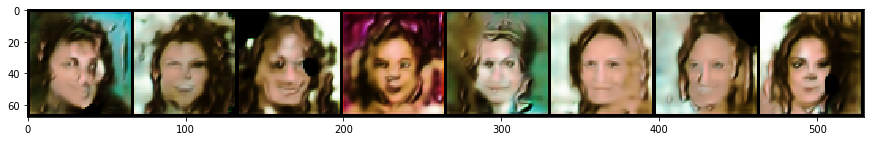


EPOCH:  9



DISCRIMINATOR Training loss:... 0.83464303924758
GENERATOR Training loss:... 2.3748349309607693

Best GLoss :  2.3748349309607693 ....OLD :  2.4247793265520134
show img


<Figure size 432x288 with 0 Axes>

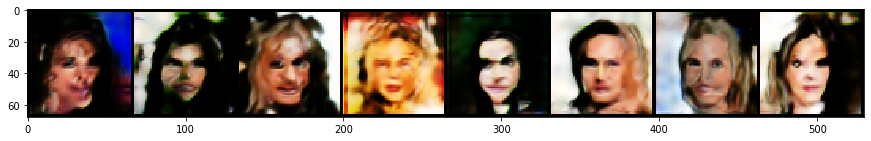


EPOCH:  10



DISCRIMINATOR Training loss:... 0.884602212267666
GENERATOR Training loss:... 2.1720679860211445

Best GLoss :  2.1720679860211445 ....OLD :  2.3748349309607693
show img


<Figure size 432x288 with 0 Axes>

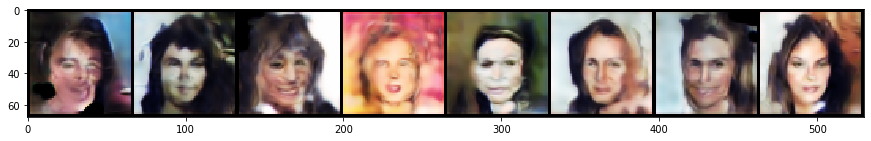

In [8]:
epochs = 10
save_path = 'exp/exp1/'
save_last = True
hist = train_loop(
                train_loader, 
                epochs,
                discriminator, 
                generator,
                discr_opt,
                gen_opt,
                criterion,
                save_path,
                save_last,
                show_img=True
                )    

<Figure size 432x288 with 0 Axes>

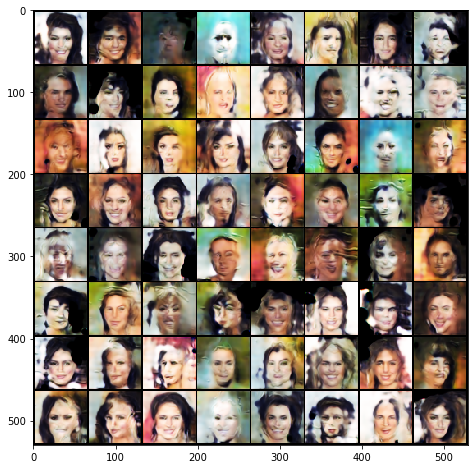

In [9]:
gen_fake_images(generator,
                device, 
                amount=64, 
                z_size=100, 
                display_size=8)